%%latex \tableofcontents

In [29]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,5)
plt.rcParams['figure.dpi'] = 300
import os
import torch.optim
import scipy.io
from torch import nn
from torch.utils.data import Dataset, DataLoader
master_dir = os.getcwd()
# For loading my own script:
%load_ext autoreload
%autoreload 2
import assignment1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Define architecture to be used

In [33]:
class FeedForwardNet(nn.Module):
    """
    Class that defines a simple feedforward neural network with one hidden layer.
    """
    def __init__(self, input_size: int, output_size: int, hidden_size: int = 10):
        """
        Initialize the neural network architecture.
        :param input_size: Size of the input variables.
        :param output_size: Size of the output variables.
        :param hidden_size: Number of hidden neurons in the network.
        """
        super(FeedForwardNet, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.sigmoid = nn.Sigmoid()
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x: torch.Tensor):
        """
        Computes the output of the network given the input.
        :param x: Input to the network.
        :return: Output as computed by the network.
        """
        hidden = self.sigmoid(self.hidden(x))
        output = self.output(hidden)
        return output

# Backpropagation in feedforward multi-layer networks

Have a look at the data

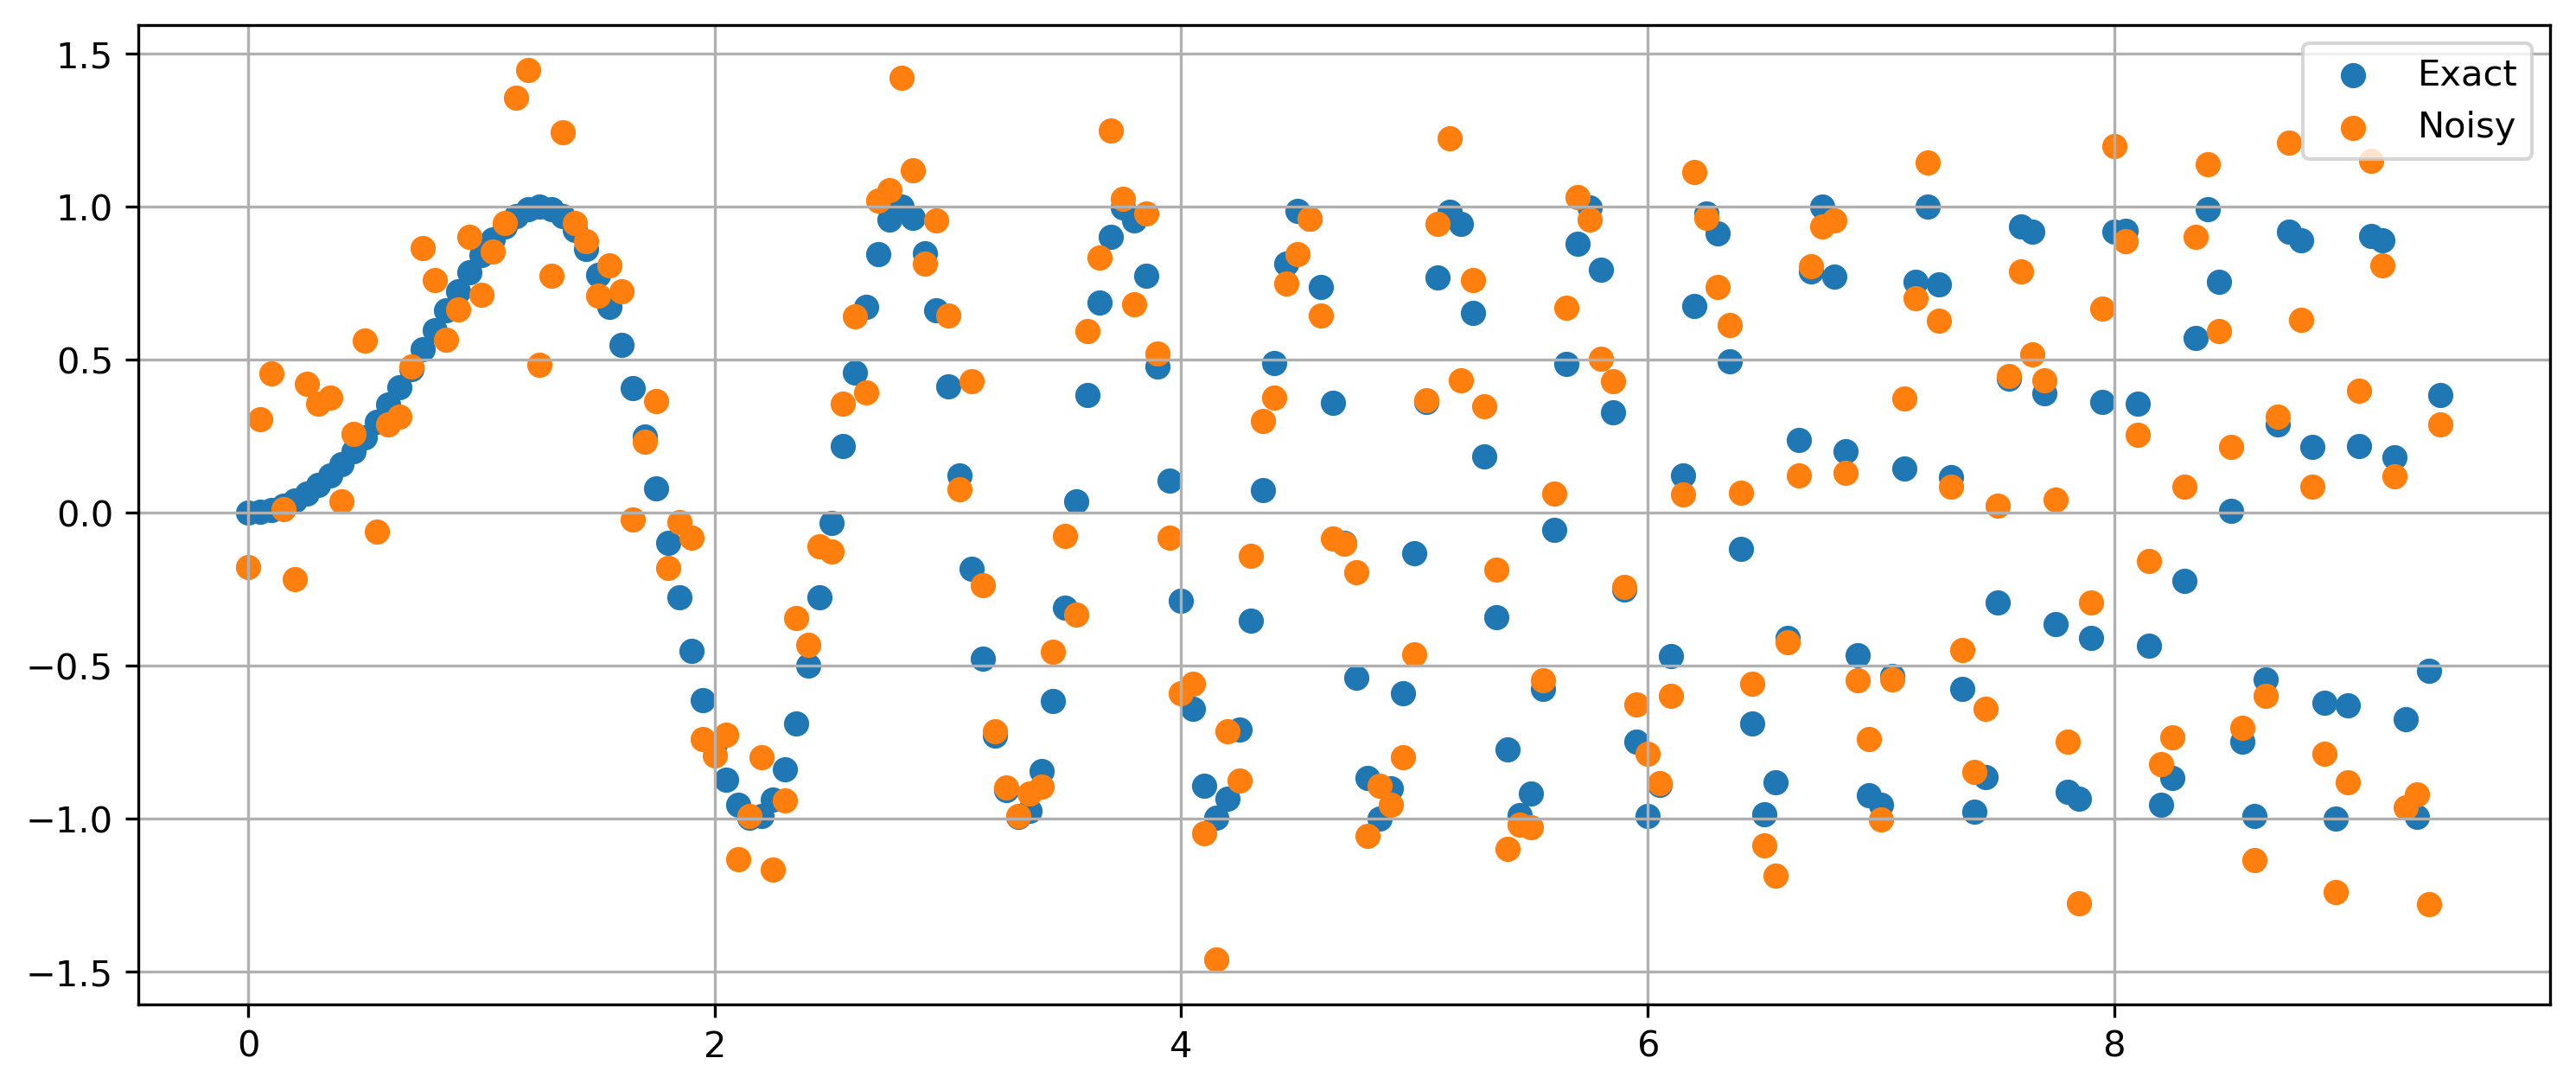

In [30]:
x, y = assignment1.generate_sine_data()
xn, yn = assignment1.generate_sine_data(noise=True)
plt.scatter(x, y, label="Exact")
plt.scatter(xn, yn, label="Noisy")
plt.grid()
plt.legend()
plt.show()

## Without noise

In [ ]:
train_x, train_y = assignment1.generate_sine_data()

Train a neural network on the data

In [34]:
net = FeedForwardNet(input_size=1, output_size=1, hidden_size=20)

# Personal regression problem

Read in the .mat file

In [5]:
data = scipy.io.loadmat(os.path.join(master_dir, "Data/Data_Problem1_regression.mat"))
X1 = data['X1']
X1 = data['X2']
T1 = data['T1']
T2 = data['T2']
T3 = data['T3']
T4 = data['T4']
T5 = data['T5']